In [1]:
from google.colab import files


uploaded = files.upload()

Saving magic04.csv to magic04.csv


In [2]:
from google.colab import files


uploaded = files.upload()

Saving magic.csv to magic.csv


In [3]:
import pandas as pd
import numpy as np
import csv

In [4]:
column_names = [
    'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
    'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'
]

csv_file_path = 'magic04.csv'

# Writing column names and data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write the header (column names)
    csv_writer.writerow(column_names)

second_csv_file_path = 'magic.csv'

# Reading data from the second CSV file
with open(second_csv_file_path, 'r') as second_csv_file:
    csv_reader = csv.reader(second_csv_file)

    # Skip the header row in the second CSV file if it has one
    next(csv_reader, None)

    # Append the data from the second CSV file to the existing CSV file
    with open(csv_file_path, 'a', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write the data from the second CSV file
        csv_writer.writerows(csv_reader)

In [5]:
df = pd.read_csv('magic04.csv')
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [6]:
df['class'].value_counts()

g    12331
h     6688
Name: class, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score,  confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from tensorflow.keras import layers

In [9]:
X = df.drop('class', axis=1)
y = df['class']

In [10]:
X.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098


In [11]:
y.head()

0    g
1    g
2    g
3    g
4    g
Name: class, dtype: object

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [16]:
modellreg = LogisticRegression(random_state=42)
modellreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [17]:
# Predictions
y_predlreg = modellreg.predict(X_test_scaled)

In [18]:
# Model evaluation
accuracylreg = accuracy_score(y_test, y_predlreg)
reportlreg = classification_report(y_test, y_predlreg)
conf_matrixlreg = confusion_matrix(y_test, y_predlreg)
roc_auc = roc_auc_score(y_test, modellreg.predict_proba(X_test_scaled)[:, 1])

# Precision-Recall curve and Area Under the Curve (AUC)
precision, recall, _ = precision_recall_curve(y_test, modellreg.predict_proba(X_test_scaled)[:, 1])
pr_auc = auc(recall, precision)

print(f'Accuracy: {accuracylreg:.4f}')
print('\nClassification Report:\n', reportlreg)
print('\nConfusion Matrix:\n', conf_matrixlreg)
print(f'\nROC AUC: {roc_auc:.4f}')
print(f'Precision-Recall AUC: {pr_auc:.4f}')

Accuracy: 0.7915

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      2460
           1       0.76      0.60      0.67      1344

    accuracy                           0.79      3804
   macro avg       0.78      0.75      0.76      3804
weighted avg       0.79      0.79      0.79      3804


Confusion Matrix:
 [[2199  261]
 [ 532  812]]

ROC AUC: 0.8359
Precision-Recall AUC: 0.7789


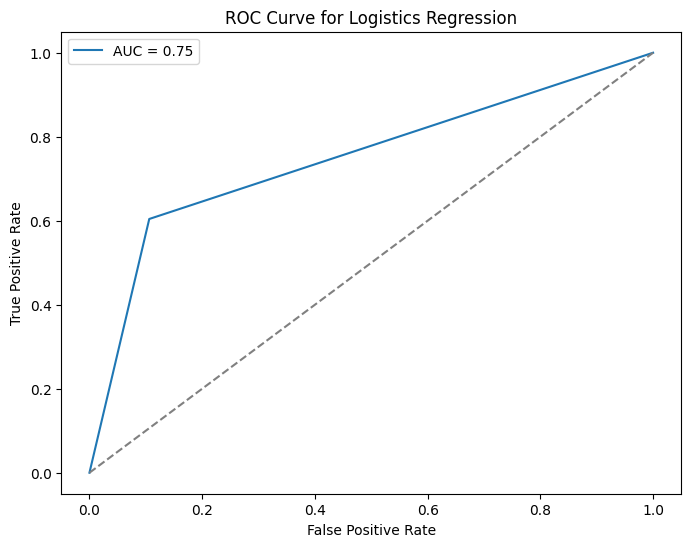

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_predlreg)
auc = roc_auc_score(y_test, y_predlreg)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistics Regression')
plt.legend()
plt.show()

# Neural Network


In [21]:
modelneural = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [22]:
modelneural.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
modelneural.fit(X_train_scaled, y_train, epochs=4, batch_size=32, validation_split=0.3)

Epoch 1/4
333/333 [==============================] - 3s 5ms/step - loss: 0.4268 - accuracy: 0.8065 - val_loss: 0.3747 - val_accuracy: 0.8436
Epoch 2/4
333/333 [==============================] - 1s 4ms/step - loss: 0.3627 - accuracy: 0.8444 - val_loss: 0.3493 - val_accuracy: 0.8556
Epoch 3/4
333/333 [==============================] - 1s 4ms/step - loss: 0.3455 - accuracy: 0.8564 - val_loss: 0.3364 - val_accuracy: 0.8620
Epoch 4/4
333/333 [==============================] - 1s 4ms/step - loss: 0.3365 - accuracy: 0.8612 - val_loss: 0.3296 - val_accuracy: 0.8659


In [24]:
loss, accuracy = modelneural.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy:.4f}')

119/119 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8617
Accuracy: 0.8617


In [25]:
y_predneural = modelneural.predict(X_test_scaled)
y_pred_classes = (y_predneural > 0.5).astype(int)

119/119 [==============================] - 0s 1ms/step


In [26]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_classes)
print('\nClassification Report:\n', report)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      2460
           1       0.89      0.69      0.78      1344

    accuracy                           0.86      3804
   macro avg       0.87      0.82      0.84      3804
weighted avg       0.87      0.86      0.86      3804



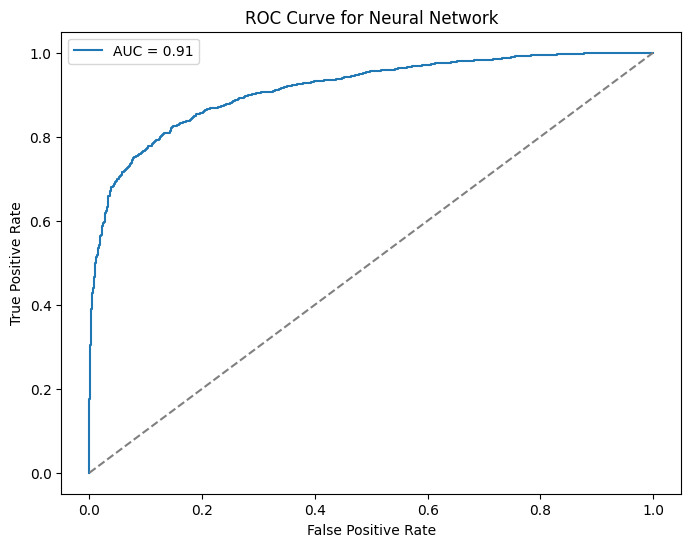

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_predneural)
auc = roc_auc_score(y_test, y_predneural)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend()
plt.show()

In [28]:
k_value = 5

In [29]:
modelknn = KNeighborsClassifier(n_neighbors=k_value)
modelknn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [30]:
# Predictions
y_predknn = modelknn.predict(X_test_scaled)

In [31]:
# Model evaluation
accuracyknn = accuracy_score(y_test, y_predknn)
reportknn = classification_report(y_test, y_predknn)

In [32]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8617
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2460
           1       0.89      0.69      0.78      1344

    accuracy                           0.86      3804
   macro avg       0.87      0.82      0.84      3804
weighted avg       0.87      0.86      0.86      3804



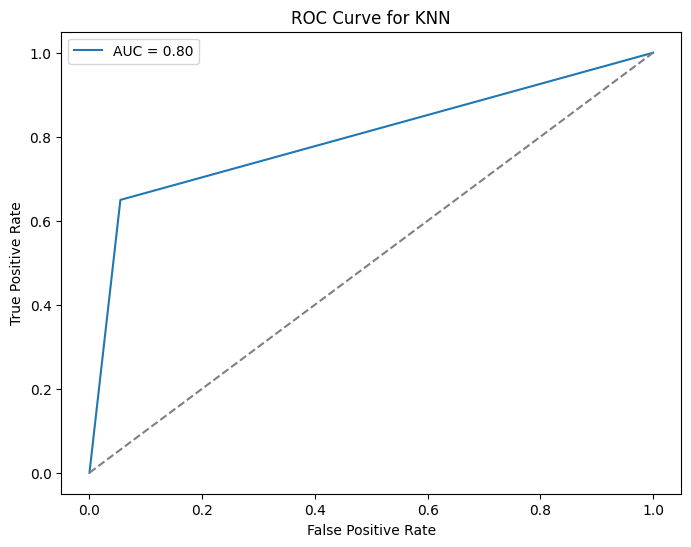

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_predknn)
auc = roc_auc_score(y_test, y_predknn)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()

# XGBoost

In [34]:
import xgboost as xgb
from xgboost import XGBClassifier

In [35]:
# XGBoost with hyperparameter tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [38]:
modelxgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(modelxgb, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [39]:
best_params = grid_search.best_params_

In [40]:
modelxgb = xgb.XGBClassifier(random_state=42)

In [41]:
modelxgbbest = XGBClassifier(**best_params, random_state=42)
modelxgbbest.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [43]:
y_predxgb = modelxgbbest.predict(X_test_scaled)
y_pred_proba_xgb = modelxgbbest.predict_proba(X_test_scaled)[:, 1]

In [44]:
accuracy = accuracy_score(y_test, y_predxgb)
report = classification_report(y_test, y_predxgb)
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)

In [45]:
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', report)
print(f'ROC AUC: {roc_auc:.4f}')

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.8799

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      2460
           1       0.88      0.76      0.82      1344

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

ROC AUC: 0.9340


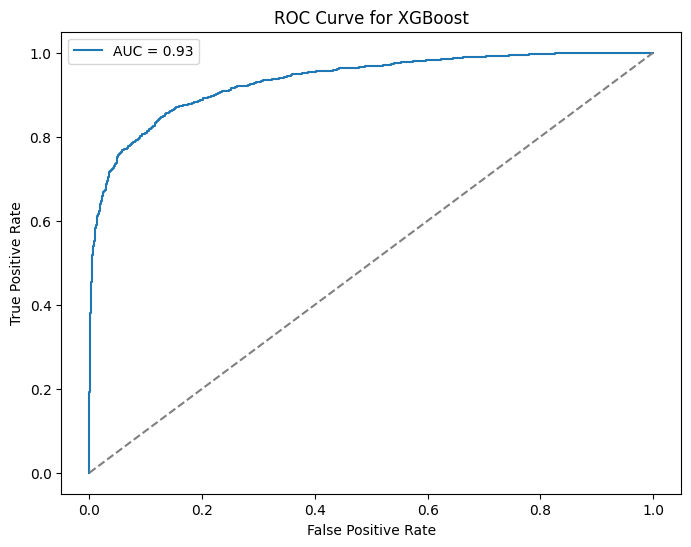

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Hence, we come to conclusion that XGBoost outperforms other models here with astonising accuracy of 87.99% and AUC of 0.93. So we will move forward with XGBoos here.

Now we use pickle to bind-up our model into pickle file for using it in predictions with a web interface.

In [47]:
import pickle

pickle.dump(modelxgbbest, open('gamma_model.pkl', 'wb'))